# Rodrigo João Cabriz Simões, nº 53154

# Advanced Data Analysis - Assignment 3

This notebook contains the proposed solution for **Assignment 3** of the Advanced Data Analysis course.


### DEADLINE: 9-November-2022

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. While doing this assignment, you can use or adapt any code from the lectures if you want. 

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
### Notebook Instructions
* You only need to deliver this notebook file (notice that, a notebook file extension is filename.ipynb) - Data files must not be submitted
* The notebook should be delivered with the outputs already available


# Group I 

Nowadays, industry players are using product quality certifications to promote their products.
Vital factor in red wine certification and quality assessment is physicochemical tests, which
are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical
properties. We would like to determine which feature(s) can be used regression that
best predicts the quality red wine.

Structure of the dataset:
Input variables (based on physicochemical tests):
- Fixed Acidity: Most acids involved with wine or fixed or non-volatile (do not evaporate readily)
- Volatile Acidity: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- Citric Acid: Often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes
- Residual Sugar: From the natural grape sugars left in a wine after the alcoholic fermentation finishes.
- Chlorides: The amount of salt in the wine
- Free Sulfur Dioxide: It prevents microbial growth and the oxidation of wine
- Total Sulfur Dioxide: The amount of free + bound forms of SO₂
- Density: Sweeter wines have a higher density
- pH: Describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale
- Alcohol: Available in small quantities in wines makes the drinkers sociable
- Sulphates: A wine additive that contributes to SO₂ levels and acts as an antimicrobial and antioxidant
- Quality: which is the output variable/predictor

The dataset source is taken from https://archive.ics.uci.edu/ml/datasets/wine+quality.


In [1]:
# This code cell does not need to be changed
import os
import pandas as pd
from sklearn import linear_model

dataFileName = "winequality-red.csv"
dataDF = pd.read_csv(dataFileName)

dataDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Question 1 (1 point out of 20)

Identify the variables that are more linearly correlated with the quality of red wine

In [2]:
#TODO
# Absolute value to assess the variables more linearly correlated
dataDF.corr()["quality"].abs().sort_values(ascending=False).iloc[1:]

alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64

## Question 2 ( 2 points out of 20)

Estimate the true error of a model that uses the top 4 variables more correlated with the quality of red wine

In [3]:
#TODO
from sklearn.model_selection import cross_val_score

top4var = dataDF.corr()["quality"].abs().sort_values(ascending=False).iloc[1:].nlargest(4).index

def regression_f(input, quality):
    model = linear_model.LinearRegression()
    return -1 * cross_val_score(model, input, quality, scoring='neg_mean_squared_error', cv=10).mean()


test_error = regression_f(dataDF[list(top4var)], dataDF[["quality"]])
print(f'Estimated true error (test error): {test_error}')

Estimated true error (test error): 0.4439518038537466


## Question 3 ( 4 points out of 20)

Evaluate two other models of your choice and compare/discuss their expected errors? (explain your criteria for each model tested)

In [4]:
#TODO

# Consider 2 variables with highest linear correlation
top2var = dataDF.corr()["quality"].abs().sort_values(ascending=False).iloc[1:].nlargest(2).index

test_error = regression_f(dataDF[list(top2var)], dataDF[["quality"]])
print(f'Estimated true error (test error) for a model that uses the 2 variables with the highest linear correlation: {test_error}')
print("\n")

# Consider all variables
test_error = regression_f(dataDF.drop(["quality"], axis = 1), dataDF[["quality"]])
print(f'Estimated true error (test error) for a model that uses the all variables: {test_error}')

Estimated true error (test error) for a model that uses the 2 variables with the highest linear correlation: 0.4491545479773307


Estimated true error (test error) for a model that uses the all variables: 0.435184904030092


**Explanation**

We should choose the model thats uses all variables, because it has the lower estimated true error. Using cross-validation on each model to assess the mean of the MSEs between each set of variables and the quality of red wine, we estimate a smaller true error when all inputs variables are considered.

I chose a model that only uses the 2 variables with highest linear correlation, as it could have a lower estimated true error if there was overfitting in the first model, which is not the case.
I also chose a model that uses all variables to check if the data would fit better with more factors to account for, which was the case. Therefore, we can say the model from the last exercise suffers from underfitting.

## Question 4 ( 3 points out of 20)

Based on the best model identified previously, build a final model, report the formula (coefficients found) and evaluate it. On average, how far is your predictions from the actual values?

Coefficients of the model: [[ 2.72432239e-02 -1.03435127e+00 -1.74033092e-01  1.51390982e-02
  -1.81062782e+00  4.22993833e-03 -3.29586903e-03 -1.71297726e+01
  -3.93833264e-01  8.33810797e-01  2.71436753e-01]]


Interception of the model: 21.20140324926612


(Model evaluation) Mean squared error: 0.40938401510422395
(Last question) Average difference between the predictions and the actual values: 0.4941860285802683


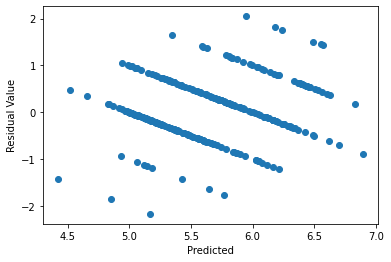

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Split data into train set and test set
train_set, test_set = train_test_split(dataDF, test_size = 0.2, random_state = 40)

y_train = train_set[['quality']]
x_train = train_set.drop(['quality'], axis = 1)

# Fit linear model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

coef = model.coef_
intercept = model.intercept_

print("Coefficients of the model:", str(coef))
print("\n")
print("Interception of the model:", float(intercept))
print("\n")

y_test = test_set[['quality']]
x_test = test_set.drop(['quality'], axis = 1)
y_pred = model.predict(x_test)
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual Value')

mse = mean_squared_error(y_test, y_pred)
print("\033[1m" + "(Model evaluation) " + "\033[0m" + "Mean squared error:",float(mse))

avg = mean_absolute_error(y_pred, y_test)
print("\033[1m" + "(Last question) " + "\033[0m" + "Average difference between the predictions and the actual values:", float(avg))

**Explanation**

The residuals graph is simetrical because the residuals are centered around 0.

# Group II

The file internet.csv contains the estimated number of internet users (in millions) for each year from 1995
through 2012. For answering the following questions, you can use or adapt any code from the lectures or exercises
if you want.


In [6]:
dataFileName = "internet.csv"
dataDF = pd.read_csv(dataFileName)

In [7]:
dataset_df = pd.DataFrame()
dataset_df['year'] = dataDF.index
dataset_df['n_users'] = dataDF['n_users']
x = dataset_df[['year']]
y = dataset_df[['n_users']]
dataset_df.head()

,year,n_users
0,0,16
1,1,36
2,2,70
3,3,147
4,4,248


## Question 1 (5 points out of 20)

In lecture 6, we used the logistic function with an offset parameter to better fit the curve to some arbitrary starting point:

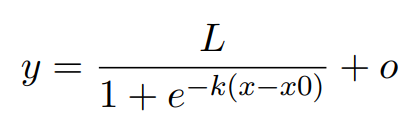

Fit this model to the data and show to the plots of the data and the curve predicted by the
model. Additionally, display the parameters found for the logistic model and explain the meaning of each one.  

Note: I suggest you use these starting values for the minimization: L = 1000, x0 = 10, k = 0.1 and
o = −300. If you use other values the minimization may not converge properly.


Parameters found: x0 => 15.22085242072284 ; L => 6461.99965663445 ; k => 0.188720218347374 ; o => -384.70785348059115


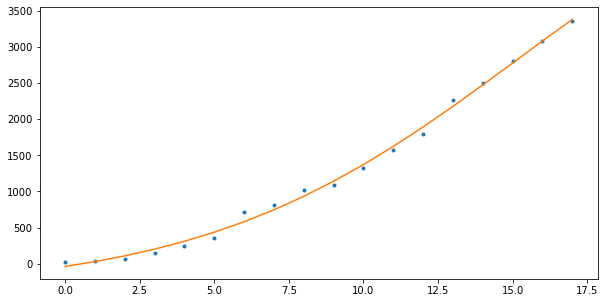

In [8]:
#TODO
from scipy.optimize import minimize 
import matplotlib.pyplot as plt
import numpy as np

# Logistic Function
def logistic(x,x0,L,k):
    return L/(1 + np.exp(-k*(x-x0)))

# Cost function - Minimize mean squared error
def log_cost(params, data):
    x0,L,k,o = params
    pred = logistic(data.iloc[:,0],x0,L,k) + o
    return np.mean( (pred-data.iloc[:,1])**2)

plt.figure(figsize=(10,5))
x0,L,k,o = [10, 1000, 0.1, -300]
st_params = x0,L,k,o
res=minimize(log_cost,st_params,args=(dataset_df))
x0,L,k,o = res.x

# Used the model found (logistic model with a set of parameters and an offset) to predict the values
pred = logistic(dataset_df.iloc[:,0],x0,L,k) + o

# Plot the data and the model built
plt.plot(dataset_df.iloc[:,0],dataset_df.iloc[:,1],'.')
plt.plot(dataset_df.iloc[:,0],pred)

print("Parameters found: x0 =>", x0, ";", "L =>", L, ";", "k =>", k, ";", "o =>", o)

**Parameters explanation**

x0 => the value of the sigmoid's midpoint

L => the horizontal supremum of the values of the function (size limit of internet users)

k => the logistic growth rate/steepness of the curve

o => vertical shift of the function, used to correct the bias (offset)

## Question 2 (2 points out of 20)

Compute and plot the residuals of the model found. What can we tell about the model identified based on the Residual Plot? Is a logistic function a good option to model users' growth over time in our dataset?

Text(0, 0.5, 'Residual Value')

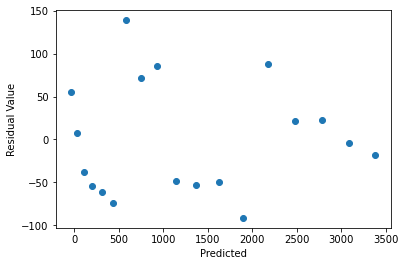

In [9]:
#TODO
residuals = dataset_df.iloc[:,1] - pred

plt.scatter(pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual Value')

**Explanation**

Higher prediction values lead to residual values closer to 0. This means the model is more accurate to predict the number of internet users in the most recent years, when the number of users has a higher value.

There is also a special trend to return predictions too high (negative residual values).

The scale for the residual value also shows how far predictions are from the real values (should be clustered around the lower single digits of the y-axis). We also do not have enough observations to analyse clusters or a normal distribution with most points centered around 0 residual value. There is therefore some uncertainty in this evaluation.

Because of all these factors, the model can be improved.

## Question 3 (3 points out of 20)

Compute the 95% confidence interval for its parameters under the assumption that the random error affecting the data points comes from the same distribution for all points.

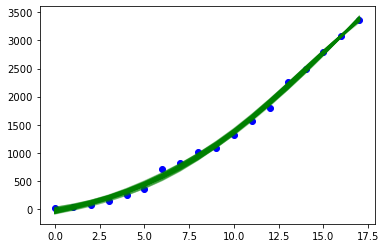

In [10]:
#TODO
params = []
lines = []
pred = logistic(dataset_df.iloc[:,0], x0, L, k) + o

residual = dataset_df.iloc[:,1] - pred

plt.scatter(x, y, color = 'blue')
replicas = 80

df_unc = pd.DataFrame(x)

list_x0 = []
list_L = []
list_k = []
list_o = []

i = 0;
for _ in range(replicas):

    rep_data = dataset_df.copy() 

    rep_data.iloc[:,1] = pred + residual * np.random.normal(size=dataset_df.shape[0])

    res = minimize(log_cost,st_params,args=(rep_data))
    x0, L, k, o = res.x
    list_x0.append(x0)
    list_L.append(L)
    list_k.append(k)
    list_o.append(o)
    pred_replica = logistic(dataset_df.iloc[:,0], x0, L, k) + o

    df_unc =  pd.concat([df_unc, pred_replica], axis=1) 
    df_unc
    i = i + 1;
    plt.plot(dataset_df.iloc[:,0], df_unc.iloc[:,i] , c = 'green',alpha=0.3)

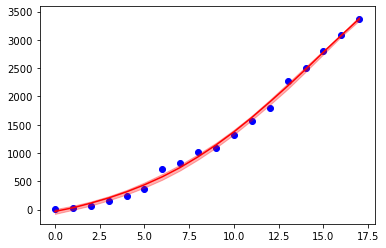

In [11]:
plt.scatter(x, y, color='blue')

df_unc1=df_unc.copy()
df_unc1['median'] = df_unc.quantile(0.5, axis = 1, interpolation = 'midpoint')
df_unc1['p5'] = df_unc.quantile(0.05, axis = 1,interpolation = 'midpoint')
df_unc1['p95'] = df_unc.quantile(0.95, axis = 1,interpolation = 'midpoint')

plt.plot(dataset_df['year'], df_unc1['median'], color = 'red')
plt.fill_between(dataset_df[['year']].iloc[:,0], df_unc1[['p5']].iloc[:,0], df_unc1[['p95']].iloc[:,0], color='red',alpha=0.3)

In [12]:
import scipy.stats as st

def CI(data, nivel):
    return st.t.interval(alpha=nivel, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

print(f'Cofidence interval of 95% for the x0 is: {CI(list_x0, 0.95)}')
print(f'Cofidence interval of 95% for the L is: {CI(list_L, 0.95)}')
print(f'Cofidence interval of 95% for the k is: {CI(list_k, 0.95)}')
print(f'Cofidence interval of 95% for the offset is: {CI(list_o, 0.95)}')
print(f'Cofidence interval of 95% for the all data is: {CI(dataset_df, 0.95)}')

Cofidence interval of 95% for the x0 is: (14.884926833959943, 15.978660122012032)
Cofidence interval of 95% for the L is: (6192.5685605567605, 7233.186983879651)
Cofidence interval of 95% for the k is: (0.18686077349053126, 0.1988245593116547)
Cofidence interval of 95% for the offset is: (-409.2252296734865, -352.1943643255687)
Cofidence interval of 95% for the all data is: (array([  5.84520695, 735.89285566]), array([  11.15479305, 1845.32936656]))
